In [1]:
from sklearn.datasets import fetch_california_housing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the California Housing dataset
california_housing = fetch_california_housing(as_frame=True)

# Create a pandas DataFrame for the features (X)
#X = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
X = california_housing.data  # Features
y = california_housing.target  # Target variable (Median House Value)
# Create a pandas Series for the target variable (y)
#y = pd.Series(california_housing.target)

X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [30]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

From the Non-null count column, we can see that there's no missing values in the dataset

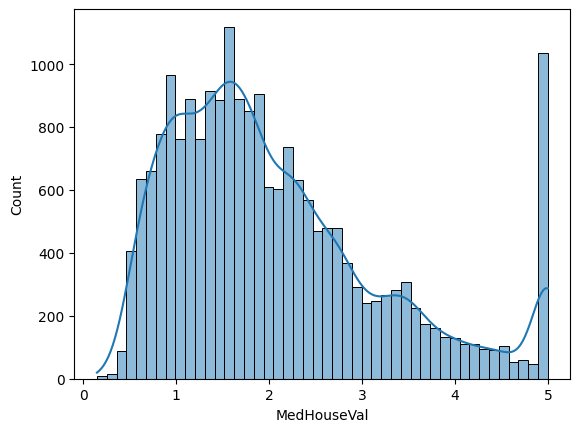

In [5]:
sns.histplot(x=y, kde=True)
plt.show()

- There's an outlier 

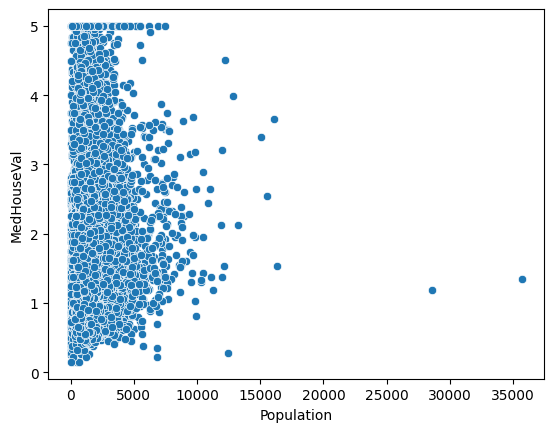

In [6]:
sns.scatterplot(x=X['Population'], y=y)
plt.show()

- There's 2 outliers

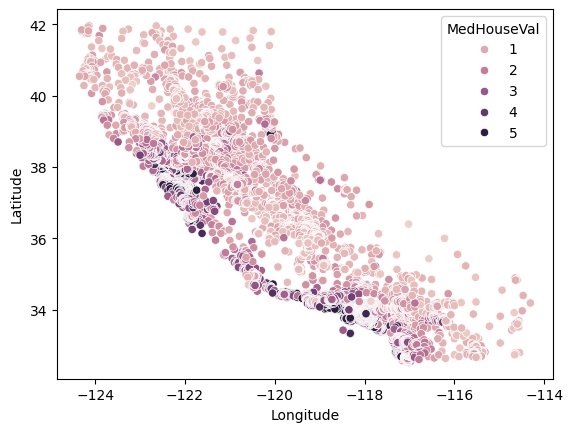

In [7]:
sns.scatterplot(x=X['Longitude'], y=X['Latitude'], hue=y)
plt.show()

- Longitude is highly negatively correlated with Latitude
-

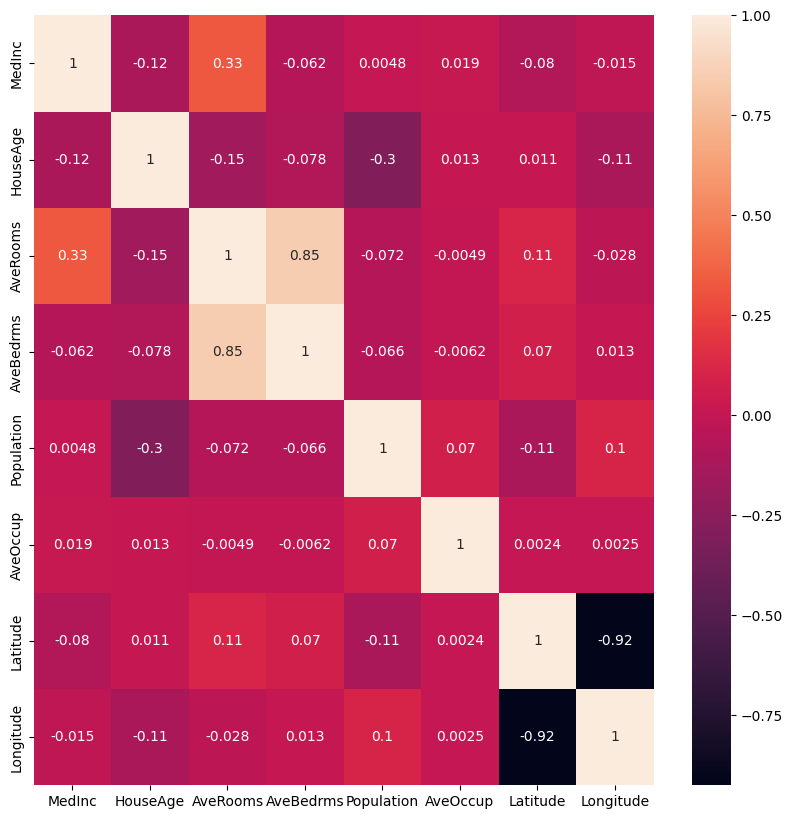

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(data=X.corr(numeric_only=True), annot=True)
plt.show()

- Longitude is highly negatively correlated with Latitude.
- All other features have little correlation with each other.

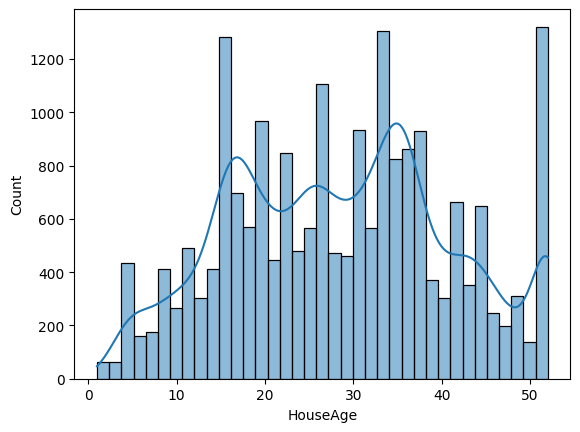

In [9]:
sns.histplot(x=X['HouseAge'], kde=True)
plt.show()

House age varies significantly
with a larger number in the mark of

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [32]:
print(y)

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64


In [ ]:
from sklearn.neural_network import MLPRegressor

# Create and train the neural network model
regressor = MLPRegressor(hidden_layer_sizes=(130, 64, 32, 16), activation='relu', random_state=42, max_iter=500)
regressor.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


In [35]:
predictions=regressor.predict(X_test)

In [36]:
from sklearn.metrics import r2_score

print(r2_score(y_test, predictions))

0.7809133268257483


### Part 4 ###

In [37]:
from sklearn.datasets import load_iris

# Load Iris dataset
iris_data = load_iris(as_frame=True)
X_iris = iris_data.data  # Features
y_iris = iris_data.target  # Target variable (species)

# Display basic statistics and general information about Iris dataset
print("Basic Statistics:")
print(X_iris.describe())

print("\nGeneral Information:")
print(X_iris.info())


Basic Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  

General Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Cou

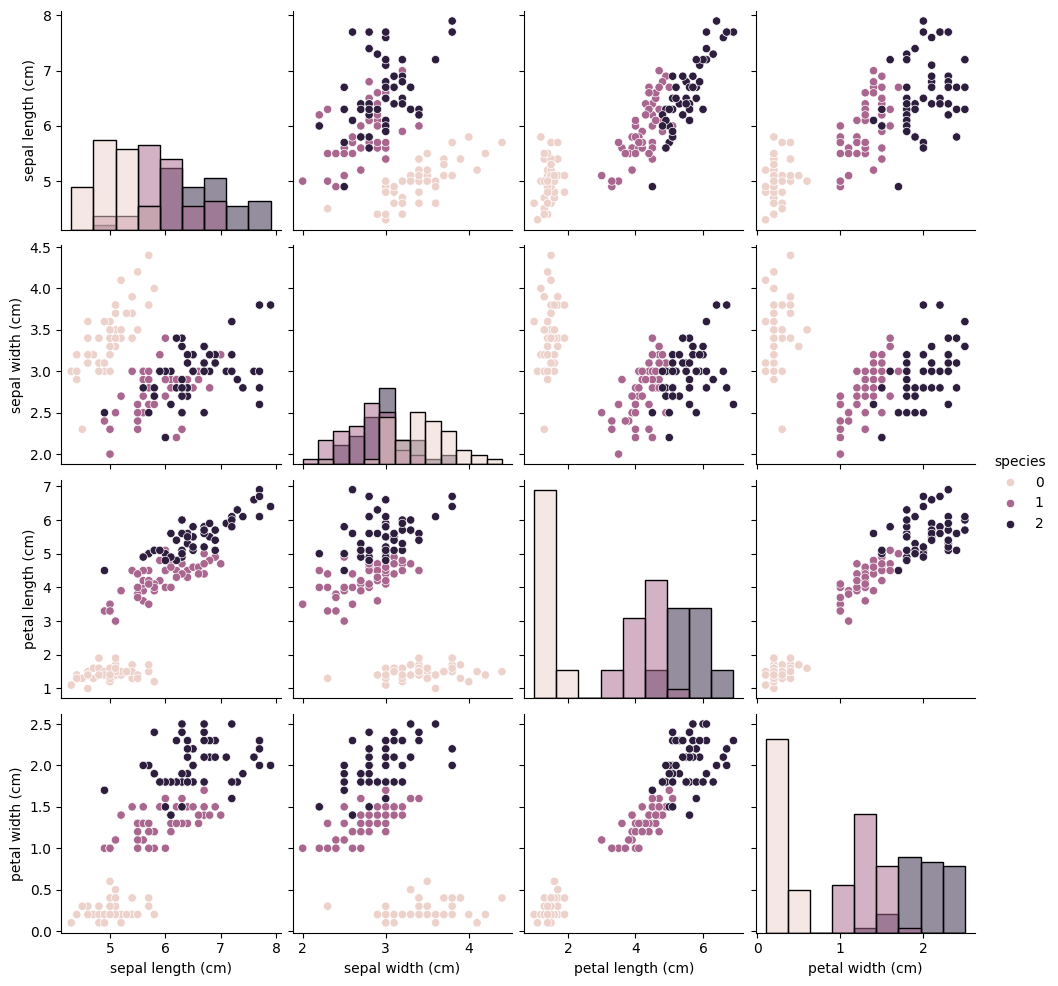

In [39]:
import seaborn as sns

# Add species to features for visualization purposes
iris_df = X_iris.copy()
iris_df['species'] = y_iris

# Create pairplot colored by species
sns.pairplot(iris_df, hue='species', diag_kind='hist')
plt.show()


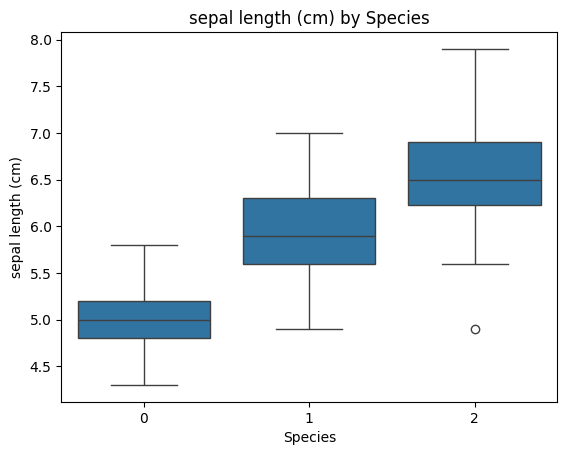

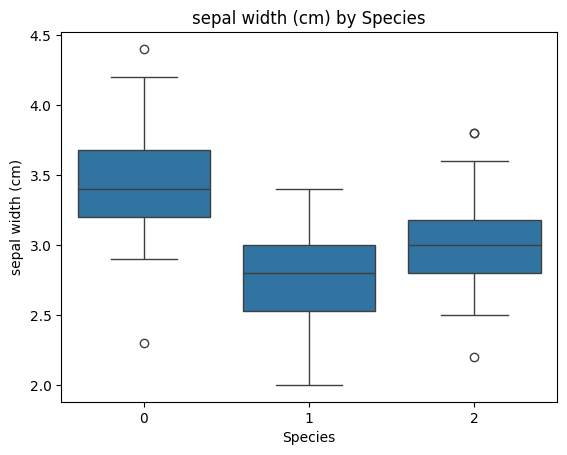

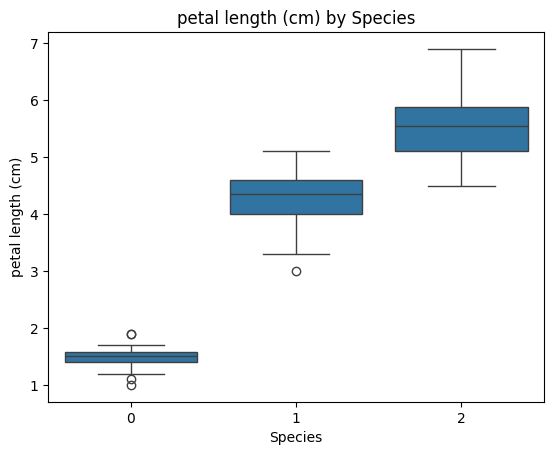

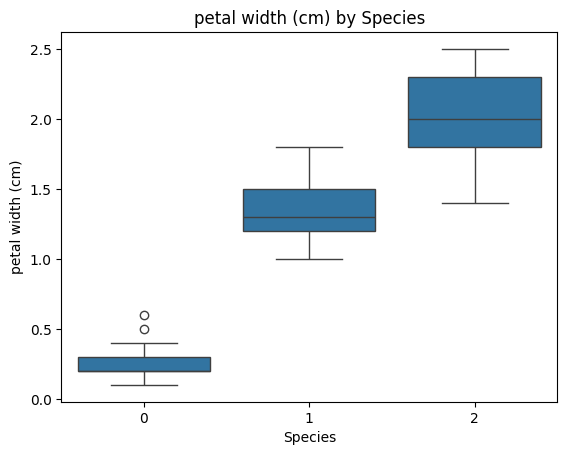

In [38]:
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
for feature in features:
    sns.boxplot(x=y_iris, y=X_iris[feature])
    plt.title(f'{feature} by Species')
    plt.xlabel('Species')
    plt.ylabel(feature)
    plt.show()


In [54]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Scale data and split into training/testing sets
scaler = StandardScaler()
X_scaled_iris = scaler.fit_transform(X_iris)
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_scaled_iris, y_iris, test_size=0.3)

# Train neural network classifier
classifier = MLPClassifier(hidden_layer_sizes=(256, 128, 64, 32), activation='relu', random_state=42)
classifier.fit(X_train_iris, y_train_iris)

# Generate predictions on the test set
predictions_iris = classifier.predict(X_test_iris)

# Evaluate model performance on test set
accuracy = accuracy_score(y_test_iris, predictions_iris)

#classifier.score(X_test_iris, y_test_iris)
print(f"Model Accuracy: {accuracy}")


Model Accuracy: 0.9111111111111111


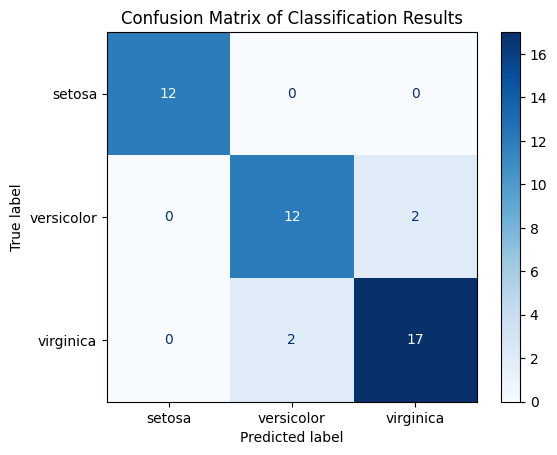

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test_iris, predictions_iris)

# Display the confusion matrix with labels for the three species
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris_data.target_names)
cmd.plot(cmap='Blues')
plt.title('Confusion Matrix of Classification Results')
plt.show()
